In [407]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder


scaler_minmax= MinMaxScaler()                                           # Create a MinMaxScaler object
scaler_standered=StandardScaler()                                       # Create a StandardScaler object
oe=OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # Create a OrdenalEncoder object
le=LabelEncoder()                                                       # Create a LabelEncoder object
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')       # Create a OneHotEncoder object

# Read CSV files

df=pd.read_csv("Training_Set_Values.csv")    # Read the CSV file
name_featrures=df.columns                    # Get the features name
len_features=len(name_featrures)                # Get the length of features
labels=pd.read_csv("Training_Set_Labels.csv") # Read the labels CSV file
labels.head()
df['target'] = labels['status_group']        # Add the target column to the dataframe
print(df.shape)                              # Print the shape of the dataframe
df.head()
#df.info()


(59400, 41)


id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   
2          good        enough          enough                   dam   
3          good           dry             dry           machine dbh   
4          good      seasonal        seasonal  rainwater harvesting   

            source_type source_class              waterpoint_type  \
0                spring  groundwater           communal standpipe   
1  rainwater harvesting      surface           communal standpipe   
2                   dam      surface  communal standpipe multiple   
3              borehole  groundwater  communal standpipe multiple   
4  rainwater harvesting      surface           communal standpipe   

  waterpoint_type_group          target  
0    communal standpipe      functional  
1    communal standpipe      functional  
2    communal standpipe      functional  
3    communal standpipe  non functional  
4    communal standpipe      functional  

[5 rows x 41 columns]

In [408]:
# Label Encodings for target columns
print(df['target'].head())
print(df['target'].unique())
df['target'] = le.fit_transform(df['target'])
print(df['target'].head())
dict(zip(le.classes_, le.transform(le.classes_))) # Check the mapping of labels to numbers


0        functional
1        functional
2        functional
3    non functional
4        functional
Name: target, dtype: object
['functional' 'non functional' 'functional needs repair']
0    0
1    0
2    0
3    2
4    0
Name: target, dtype: int64


{'functional': np.int64(0),
 'functional needs repair': np.int64(1),
 'non functional': np.int64(2)}

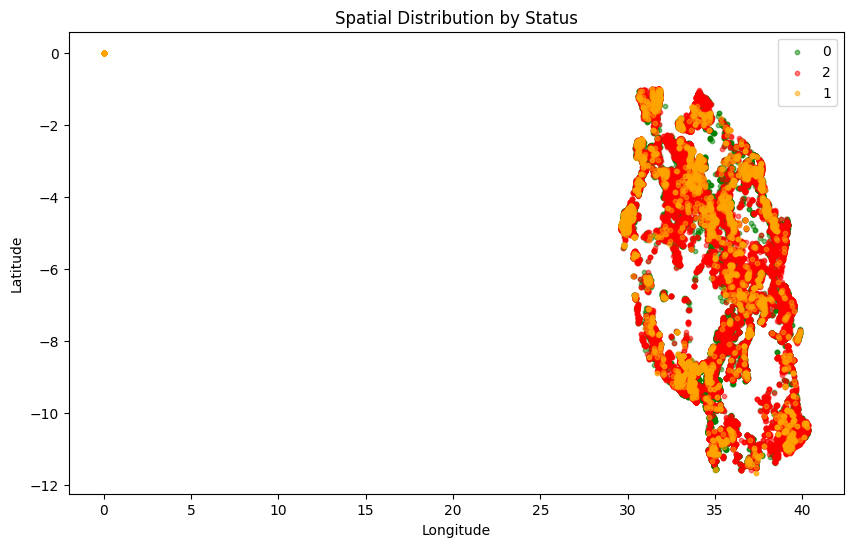

In [409]:
# to see the relationship of longitude and latitude with the target column

plt.figure(figsize=(10, 6))
categories = df['target'].unique()
colors = {0: 'green', 1: 'orange', 2: 'red'}

for category in categories:
    subset = df[df['target'] == category]
    plt.scatter(subset['longitude'], subset['latitude'], 
                c=colors[category], label=category, alpha=0.5, s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution by Status')
plt.legend()
plt.show()



In [410]:
# Columns with Nan values
nan_columns = df.columns[df.isnull().any()].tolist()           # Get the columns with NaN values
print("Columns with NaN values: ", nan_columns)                # Print the columns names with NaN values
print("Number of columns with NaN values: ", len(nan_columns)) # Print the number of columns with NaN values
#df[nan_columns].head()                                         # Print the first 5 rows of the columns with NaN values

Columns with NaN values:  ['funder', 'installer', 'wpt_name', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']
Number of columns with NaN values:  8


In [411]:
# Exploration of NaN Columns
for col in nan_columns:                                             # Loop through the columns with NaN values
    print("--------------------------------------------------")     # Print a separator line
    print("Name:",col)                                              # Print the column name
    print("Number of NaN:",df[col].isnull().sum())                  # Print the number of NaN values in the column
    print("Percentage of NaN:", df[col].isnull().sum()/len(df)*100) # Print the percentage of NaN values in the column
    print(df[col].value_counts())                                   # Print the value counts of the column


--------------------------------------------------
Name: funder
Number of NaN: 3637
Percentage of NaN: 6.122895622895623
funder
Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb           

Nan count in amount_tsh 0
count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64
median:  0.0


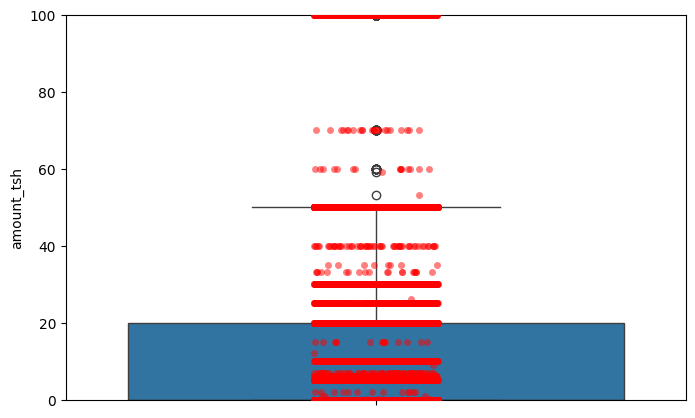

In [412]:
# Column 01 amount_tsh (Static Head)  ## 50 percent values are zero....I think Drop this column
print('Nan count in amount_tsh',df["amount_tsh"].isnull().sum()) # Number of NaN values in the column

print(df["amount_tsh"].describe())
print("median: ", df["amount_tsh"].median()) # Median is zero...means half of the points are zero (since points are positive)
plt.figure(figsize=(8,5))
sns.boxplot(df["amount_tsh"])
sns.stripplot(df["amount_tsh"],color="red",alpha=0.5)
plt.ylim(0, 100) 
plt.show()




In [413]:
"""
# Remove the outliers from the amount_tsh column
Q1=df["amount_tsh"].quantile(0.25) # 25th percentile
Q3=df["amount_tsh"].quantile(0.75) # 75th percentile
IQR=Q3-Q1 # Interquartile range
Lower_bound_amount_tsh=Q1-1.5*IQR # Lower bound
Upper_bound_amount_tsh=Q3+1.5*IQR # Upper bound
median_amount_tsh=df["amount_tsh"].median() # Median value

df["amount_tsh_outlier_replaced_median"]=df["amount_tsh"].apply(lambda x:x if ((x>=Lower_bound_amount_tsh) &(x<=Upper_bound_amount_tsh)) else median_amount_tsh) # Replace outliers with median value


plt.figure(figsize=(8,5))
sns.boxplot(df["amount_tsh"])
sns.stripplot(df["amount_tsh_outlier_replaced_median"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of amount_tsh After Outlier Removal With Median")
plt.ylim(0, 100) 
plt.show() # Show the plot
print(df["amount_tsh_outlier_replaced_median"].describe())
"""


'\n# Remove the outliers from the amount_tsh column\nQ1=df["amount_tsh"].quantile(0.25) # 25th percentile\nQ3=df["amount_tsh"].quantile(0.75) # 75th percentile\nIQR=Q3-Q1 # Interquartile range\nLower_bound_amount_tsh=Q1-1.5*IQR # Lower bound\nUpper_bound_amount_tsh=Q3+1.5*IQR # Upper bound\nmedian_amount_tsh=df["amount_tsh"].median() # Median value\n\ndf["amount_tsh_outlier_replaced_median"]=df["amount_tsh"].apply(lambda x:x if ((x>=Lower_bound_amount_tsh) &(x<=Upper_bound_amount_tsh)) else median_amount_tsh) # Replace outliers with median value\n\n\nplt.figure(figsize=(8,5))\nsns.boxplot(df["amount_tsh"])\nsns.stripplot(df["amount_tsh_outlier_replaced_median"], color="red", alpha=0.5)                  # Adds all points\nplt.title("Boxplot of amount_tsh After Outlier Removal With Median")\nplt.ylim(0, 100) \nplt.show() # Show the plot\nprint(df["amount_tsh_outlier_replaced_median"].describe())\n'

In [414]:

# Column 02 date_recorded (Date when the recoed entered)
print("date_recorded")
print("NaN value count:",df["date_recorded"].isnull().sum()) # Check if there are any null values in the column
df['date_recorded'] = pd.to_datetime(df['date_recorded']).dt.year# Convert to datetime format and extract year
print(df['date_recorded'].value_counts()) # Print the value counts of the column

print('Number of Unique values before outlier removal',df['date_recorded'].nunique())
df = df[~df['date_recorded'].isin([2002, 2004])] # Remove the record for years 2002 and 2004 from the dataframe.
print('Number of Unique values after outlier removal',df['date_recorded'].nunique())
                                             #31 records will be droped

"""
df['date_recorded']=oe.fit_transform(df['date_recorded'].values.reshape(-1, 1)) # Fit and transform the column using OrdinalEncoder
print('After Transformatiom',df['date_recorded'].value_counts()) # Print the value counts of the column
"""


date_recorded
NaN value count: 0
date_recorded
2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: count, dtype: int64
Number of Unique values before outlier removal 5
Number of Unique values after outlier removal 3


"\ndf['date_recorded']=oe.fit_transform(df['date_recorded'].values.reshape(-1, 1)) # Fit and transform the column using OrdinalEncoder\nprint('After Transformatiom',df['date_recorded'].value_counts()) # Print the value counts of the column\n"

NaN value count in funder: 3635
Unique values: 1895
count                      55734
unique                      1895
top       Government Of Tanzania
freq                        9078
Name: funder, dtype: object


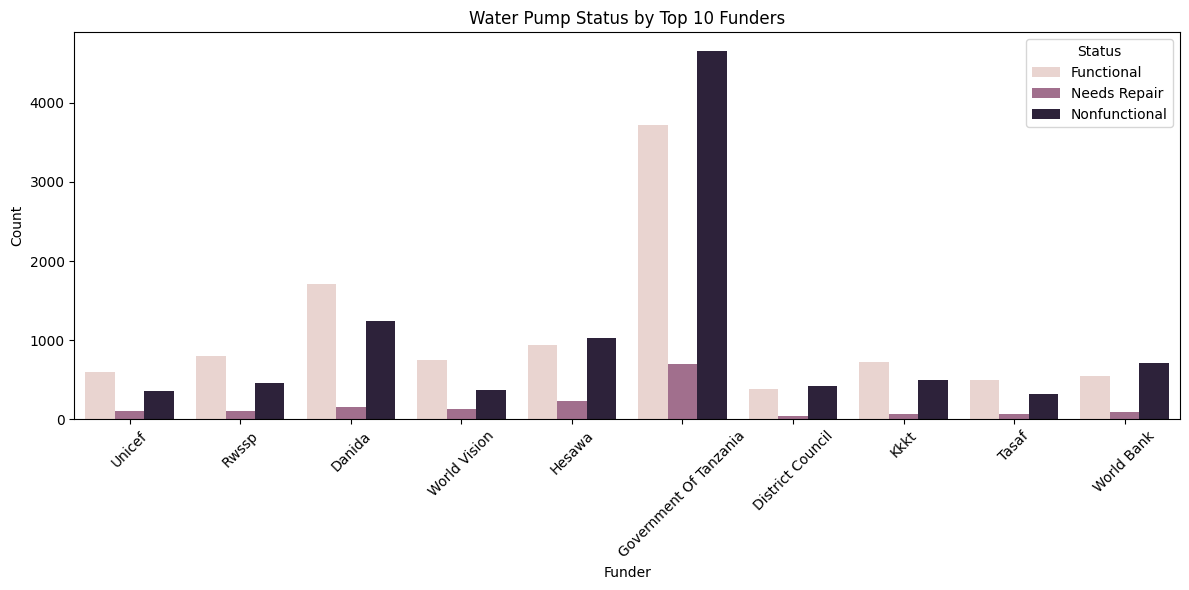

In [415]:
# Column 03 funder # Not Clear how to handle this column
print("NaN value count in funder:",df["funder"].isnull().sum()) # Check if there are any null values in the column
print('Unique values:',df['funder'].nunique()) # Print the number of unique values in the column
print(df['funder'].describe()) # Print the value counts of the column


# Get top 10 most common funders
top_funders = df['funder'].value_counts().head(10).index

# Filter only top funders
df_top = df[df['funder'].isin(top_funders)]

# Plot count of target classes per funder
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='funder', hue='target', data=df_top)
plt.xticks(rotation=45)
plt.title('Water Pump Status by Top 10 Funders')
plt.xlabel('Funder')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Functional', 'Needs Repair', 'Nonfunctional'])
plt.tight_layout()
plt.show()



--------------------------------
gps_height
NaN value count: 0
Percentage of NaN: 0.0
count    59369.000000
mean       668.403190
std        693.141417
min        -90.000000
25%          0.000000
50%        369.000000
75%       1320.000000
max       2770.000000
Name: gps_height, dtype: float64
Median: 369.0


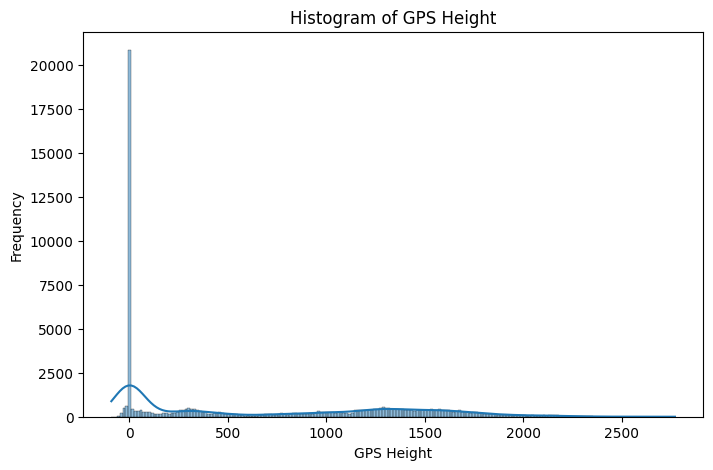

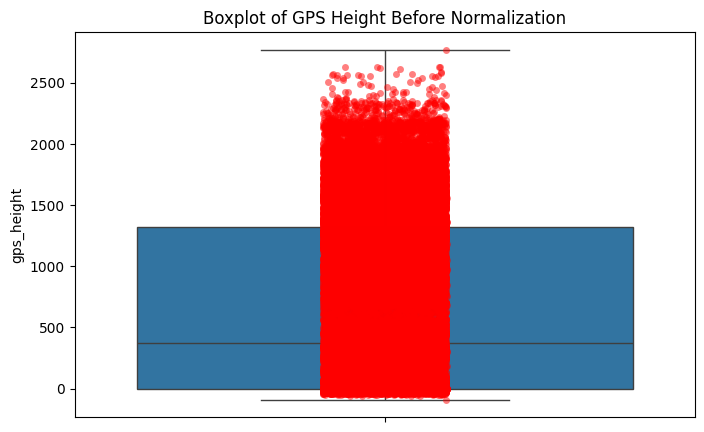

'\n\ndf["gps_height"]=scaler_minmax.fit_transform(df["gps_height"].values.reshape(-1,1)) # Fit and transform the data using MinMaxScaler\ndf["gps_height"] = np.clip(df["gps_height"], 0, 1) # To ensure that the values are between 0 and 1, in case the testdata has values outside the range of training data\nplt.figure(figsize=(8,5))\nsns.boxplot(df["gps_height"])\nsns.stripplot(df["gps_height"], color="red", alpha=0.5)  # Adds all points\nplt.ylabel("GPS Height (MinMax Normalized)")\nplt.title("Boxplot of GPS Height After Normalization")\nplt.show() # Show the plot\n\n'

In [416]:
# Column 04 gps_height (GPS height) # The column needs to be considered as data is ok, minmax normalization is used
print("--------------------------------")
print("gps_height")
print("NaN value count:",df["gps_height"].isnull().sum())                # Check if there are any null values in the column
print("Percentage of NaN:", df["gps_height"].isnull().sum()/len(df)*100) # Print the percentage of NaN values in the column
print(df["gps_height"].describe())                                       # Print the description of the column
print("Median:", df["gps_height"].median())                              # Print the median of the column
plt.figure(figsize=(8,5))
sns.histplot(df["gps_height"], bins=200, kde=True)                       # Plot the histogram of the column
plt.xlabel("GPS Height")
plt.ylabel("Frequency")
plt.title("Histogram of GPS Height")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(y=df["gps_height"])
sns.stripplot(y=df["gps_height"], color="red", alpha=0.5)                # Adds all points
plt.title("Boxplot of GPS Height Before Normalization")
plt.show() # Show the plot

"""

df["gps_height"]=scaler_minmax.fit_transform(df["gps_height"].values.reshape(-1,1)) # Fit and transform the data using MinMaxScaler
df["gps_height"] = np.clip(df["gps_height"], 0, 1) # To ensure that the values are between 0 and 1, in case the testdata has values outside the range of training data
plt.figure(figsize=(8,5))
sns.boxplot(df["gps_height"])
sns.stripplot(df["gps_height"], color="red", alpha=0.5)  # Adds all points
plt.ylabel("GPS Height (MinMax Normalized)")
plt.title("Boxplot of GPS Height After Normalization")
plt.show() # Show the plot

"""

In [417]:
# Column 05 installer # Not Clear how to handle this column
print("NaN value count in installer:",df["installer"].isnull().sum()) # Check if there are any null values in the column
print('Unique values:',df['installer'].nunique()) # Print the number of unique values in the column
print(df['installer'].describe()) # Print the value counts of the column
#print(df['installer'].value_counts()) # Print the value counts of the column
pd.crosstab(df['installer'],df['target']).head() # Cross tabulation of installer and status_group


NaN value count in installer: 3653
Unique values: 2143
count     55716
unique     2143
top         DWE
freq      17394
Name: installer, dtype: object


target       0  1    2
installer             
-            2  0    1
0          445  3  329
A.D.B        0  1    0
AAR          0  2    2
ABASIA      23  2    4

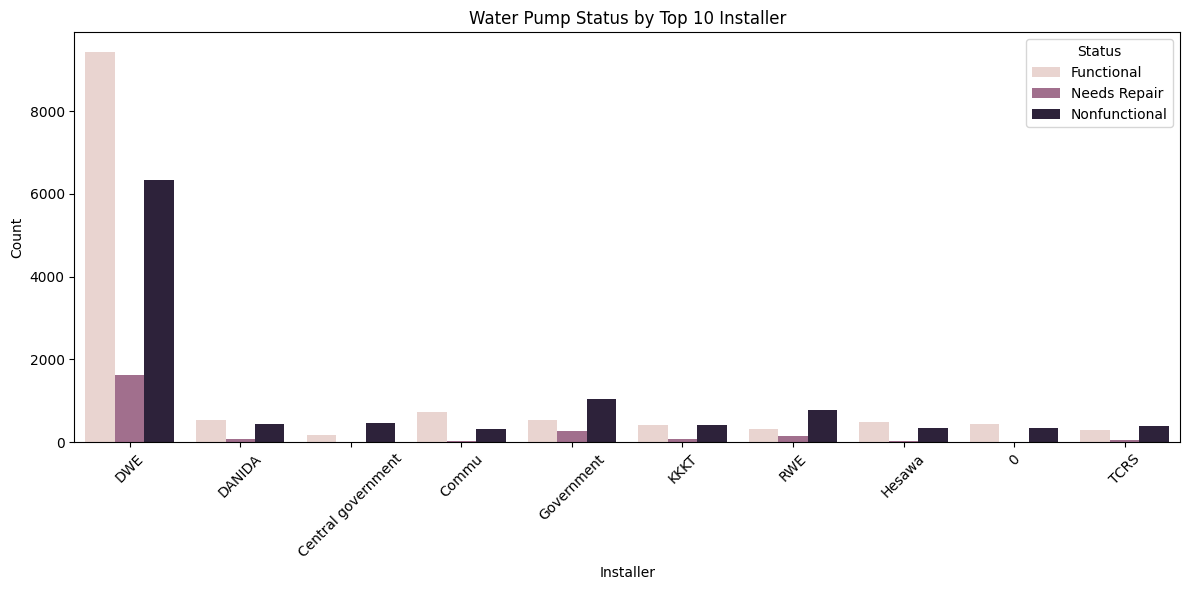

In [418]:

# Get top 10 most common installer
top_installer = df['installer'].value_counts().head(10).index

# Filter only top installer
df_top = df[df['installer'].isin(top_installer)]

# Plot count of target classes per installer
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='installer', hue='target', data=df_top)
plt.xticks(rotation=45)
plt.title('Water Pump Status by Top 10 Installer')
plt.xlabel('Installer')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Functional', 'Needs Repair', 'Nonfunctional'])
plt.tight_layout()
plt.show()

In [419]:
"""
import plotly.express as px

# Create a scatter mapbox plot with latitude and longitude
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", 
                        color="target",  # Optional: Use if you want to color by a target column
                        title="Pump Locations before oulier removal",
                        hover_data=["latitude", "longitude"])  # Optional: Display more info

fig.update_layout(mapbox_style="open-street-map")  # Use OpenStreetMap tiles

# Use an appropriate renderer for your environment (e.g., 'notebook', 'browser', etc.)
fig.show(renderer='browser')
"""


'\nimport plotly.express as px\n\n# Create a scatter mapbox plot with latitude and longitude\nfig = px.scatter_mapbox(df, lat="latitude", lon="longitude", \n                        color="target",  # Optional: Use if you want to color by a target column\n                        title="Pump Locations before oulier removal",\n                        hover_data=["latitude", "longitude"])  # Optional: Display more info\n\nfig.update_layout(mapbox_style="open-street-map")  # Use OpenStreetMap tiles\n\n# Use an appropriate renderer for your environment (e.g., \'notebook\', \'browser\', etc.)\nfig.show(renderer=\'browser\')\n'

--------------------------------
longitude
NaN value count: 0
count    59369.000000
mean        34.076855
std          6.568759
min          0.000000
25%         33.090600
50%         34.909033
75%         37.178031
max         40.345193
Name: longitude, dtype: float64
Median: 34.90903348


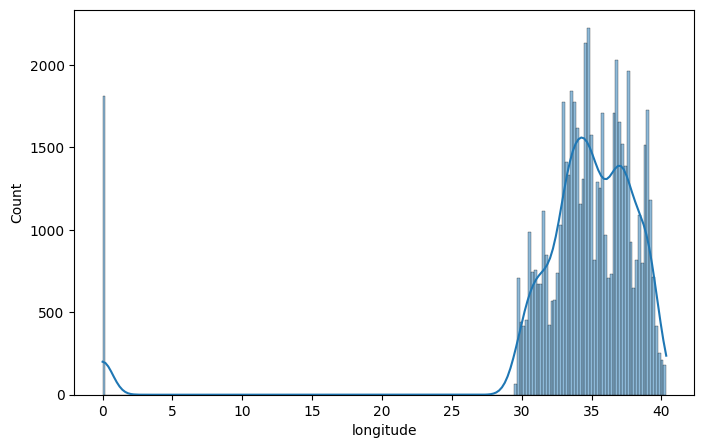

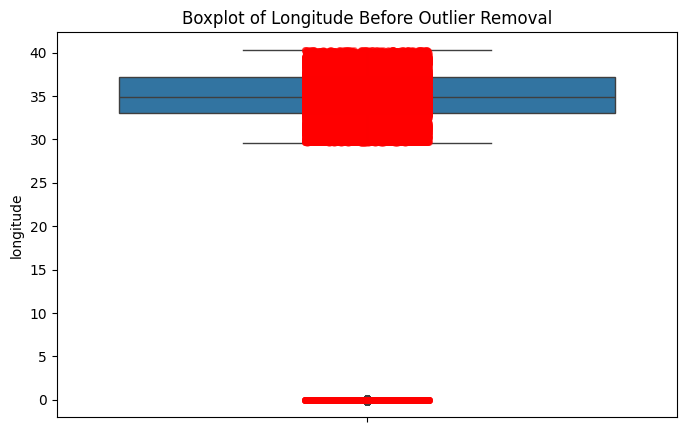

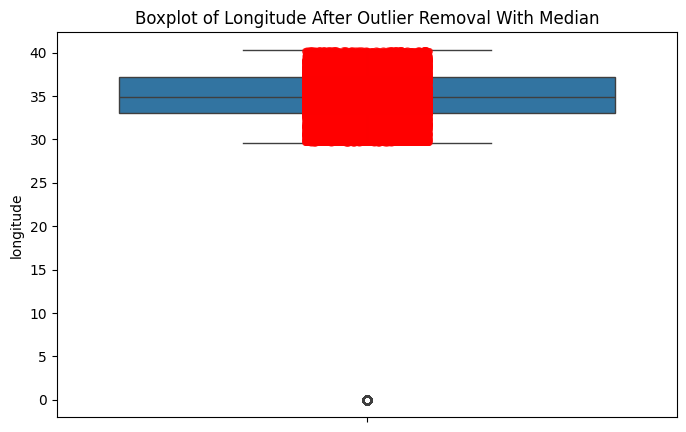

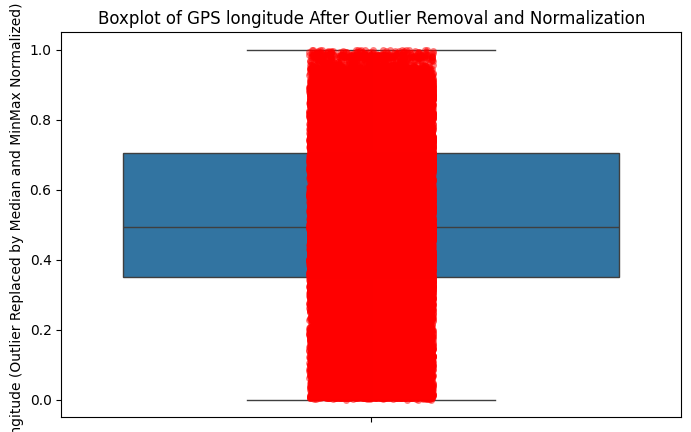

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'target'],
      dtype='object')

In [420]:
#Columns 06 longitude (GPS Coordinates) # The column needs to be considered as data is ok,outlier replaced with medain and minmax normalization
print("--------------------------------")
print("longitude")
print("NaN value count:",df["longitude"].isnull().sum())                # Check if there are any null values in the column
print(df["longitude"].describe())                                                  # Print the description of the column
print("Median:", df["longitude"].median())                              # Print the median of the column

plt.figure(figsize=(8,5))
sns.histplot(df["longitude"], bins=200, kde=True)               # Plot the histogram of the column
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(df["longitude"])
sns.stripplot(df["longitude"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of Longitude Before Outlier Removal")
plt.show() # Show the plot

# Remove the outliers from the longitude column
Q1=df["longitude"].quantile(0.25) # 25th percentile
Q3=df["longitude"].quantile(0.75) # 75th percentile
IQR=Q3-Q1 # Interquartile range
Lower_bound_longitude=Q1-1.5*IQR # Lower bound
Upper_bound_longitude=Q3+1.5*IQR # Upper bound
median_longitude=df["longitude"].median() # Median value

df["longitude_outlier_replaced_median"]=df["longitude"].apply(lambda x:x if ((x>=Lower_bound_longitude) &(x<=Upper_bound_longitude)) else median_longitude) # Replace outliers with median value


plt.figure(figsize=(8,5))
sns.boxplot(df["longitude"])
sns.stripplot(df["longitude_outlier_replaced_median"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of Longitude After Outlier Removal With Median")
plt.show() # Show the plot







df["longitude_outlier_replaced_median_minmax_normalized"]=scaler_minmax.fit_transform(df["longitude_outlier_replaced_median"].values.reshape(-1,1)) # Fit and transform the data using MinMaxScaler
df["longitude_outlier_replaced_median_minmax_normalized"] = np.clip(df["longitude_outlier_replaced_median_minmax_normalized"], 0, 1) # To ensure that the values are between 0 and 1, in case the testdata has values outside the range of training data


plt.figure(figsize=(8,5))
sns.boxplot(df["longitude_outlier_replaced_median_minmax_normalized"])
sns.stripplot(df["longitude_outlier_replaced_median_minmax_normalized"], color="red", alpha=0.5)  # Adds all points
plt.ylabel("longitude (Outlier Replaced by Median and MinMax Normalized)")
plt.title("Boxplot of GPS longitude After Outlier Removal and Normalization")
plt.show() # Show the plot


df["longitude"] = df["longitude_outlier_replaced_median_minmax_normalized"] # Replace original longitude with processed values

df.drop("longitude_outlier_replaced_median", axis=1, inplace=True) # Drop the intermediate column
df.drop("longitude_outlier_replaced_median_minmax_normalized", axis=1, inplace=True) # Drop the intermediate column


df.columns



--------------------------------
latitude
NaN value count: 0
count    5.936900e+04
mean    -5.706235e+00
std      2.945829e+00
min     -1.164944e+01
25%     -8.541109e+00
50%     -5.021698e+00
75%     -3.326299e+00
max     -2.000000e-08
Name: latitude, dtype: float64
Median: -5.02169829


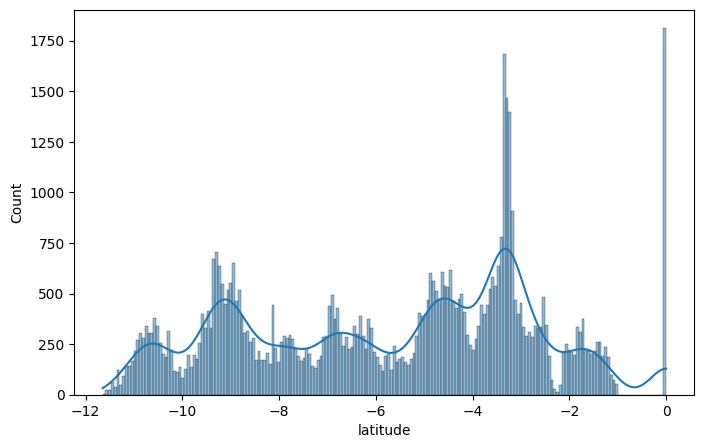

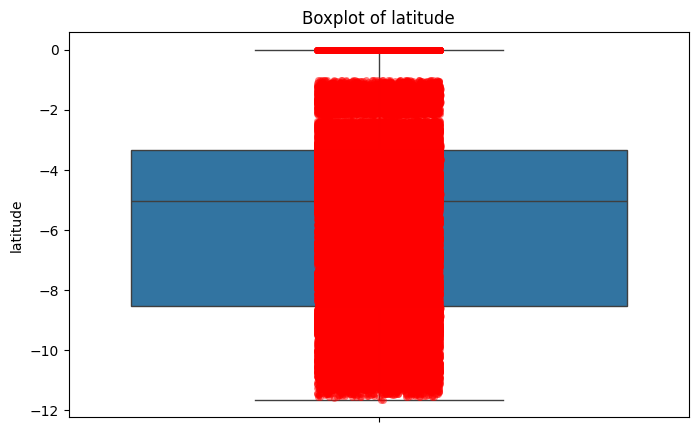

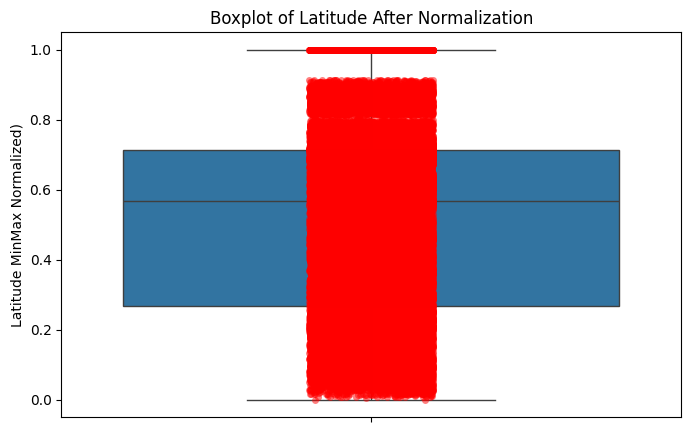

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'target'],
      dtype='object')

In [421]:
#Columns 07 latitude (GPS Coordinates) # The column needs to be considered as data is ok
print("--------------------------------")
print("latitude")
print("NaN value count:",df["latitude"].isnull().sum())                # Check if there are any null values in the column
print(df["latitude"].describe())                                                  # Print the description of the column
print("Median:", df["latitude"].median())                              # Print the median of the column

plt.figure(figsize=(8,5))
sns.histplot(df["latitude"], bins=200, kde=True)               # Plot the histogram of the column
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(df["latitude"])
sns.stripplot(df["latitude"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of latitude")
plt.show() # Show the plot




df["latitude_minmax_normalized"]=scaler_minmax.fit_transform(df["latitude"].values.reshape(-1,1)) # Fit and transform the data using MinMaxScaler
df["latitude_minmax_normalized"] = np.clip(df["latitude_minmax_normalized"], 0, 1) # To ensure that the values are between 0 and 1, in case the testdata has values outside the range of training data


plt.figure(figsize=(8,5))
sns.boxplot(df["latitude_minmax_normalized"])
sns.stripplot(df["latitude_minmax_normalized"], color="red", alpha=0.5)  # Adds all points
plt.ylabel("Latitude MinMax Normalized)")
plt.title("Boxplot of Latitude After Normalization")
plt.show() # Show the plot


df["latitude"] = df["latitude_minmax_normalized"] # Replace original longitude with processed values
df.drop("latitude_minmax_normalized", axis=1, inplace=True) # Drop the intermediate column
df.columns



In [422]:
count_greater_than_minus_one = df[df['latitude'] > -1].shape[0]
print(count_greater_than_minus_one)


59369


In [423]:
"""
import plotly.express as px

# Create a scatter mapbox plot with latitude and longitude
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", 
                        color="target",  # Optional: Use if you want to color by a target column
                        title="Pump Locations",
                        hover_data=["latitude", "longitude"])  # Optional: Display more info

fig.update_layout(mapbox_style="open-street-map")  # Use OpenStreetMap tiles

# Use an appropriate renderer for your environment (e.g., 'notebook', 'browser', etc.)
fig.show(renderer='browser')
"""

'\nimport plotly.express as px\n\n# Create a scatter mapbox plot with latitude and longitude\nfig = px.scatter_mapbox(df, lat="latitude", lon="longitude", \n                        color="target",  # Optional: Use if you want to color by a target column\n                        title="Pump Locations",\n                        hover_data=["latitude", "longitude"])  # Optional: Display more info\n\nfig.update_layout(mapbox_style="open-street-map")  # Use OpenStreetMap tiles\n\n# Use an appropriate renderer for your environment (e.g., \'notebook\', \'browser\', etc.)\nfig.show(renderer=\'browser\')\n'

In [424]:
# Column 08 wpt_name (Waterpoint Name)  # Not Clear how to handle this column
print("NaN value count in wpt_name:",df["wpt_name"].isnull().sum()) # Check if there are any null values in the column
print('Number of unique values',df['wpt_name'].nunique()) # Print the number of unique values the column

df['wpt_name'].value_counts() # Print the value counts of the column


NaN value count in wpt_name: 2
Number of unique values 37381


wpt_name
none                              3563
Shuleni                           1747
Zahanati                           830
Msikitini                          535
Kanisani                           323
Bombani                            271
Sokoni                             260
Ofisini                            253
School                             208
Shule Ya Msingi                    199
Shule                              151
Sekondari                          146
Muungano                           133
Mkombozi                           111
Madukani                           104
Mbugani                             94
Upendo                              93
Hospital                            93
Kituo Cha Afya                      90
Mkuyuni                             88
Umoja                               84
Center                              83
Ccm                                 81
Kisimani                            78
Mtakuja                             76
Ofisi Ya Kijiji 

--------------------------------
count    59369.000000
mean         0.474389
std         12.239419
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1776.000000
Name: num_private, dtype: float64


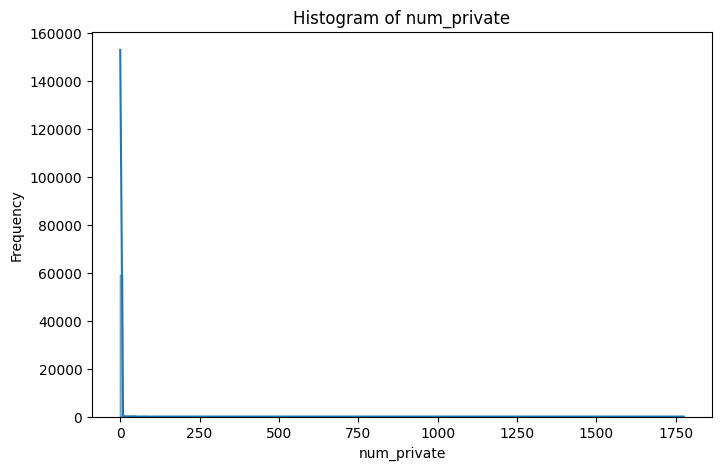

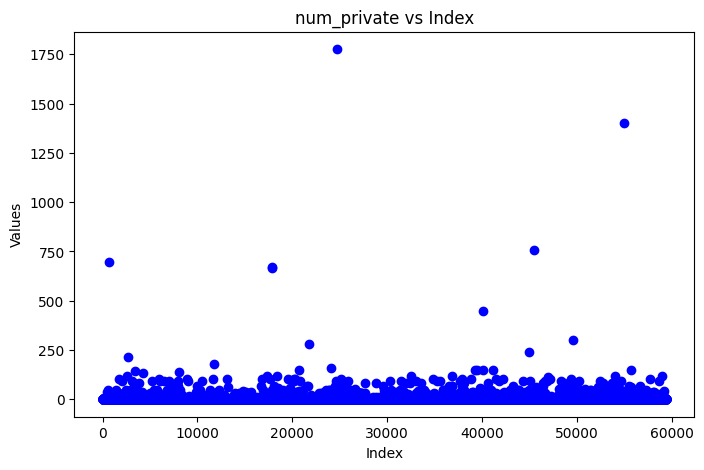

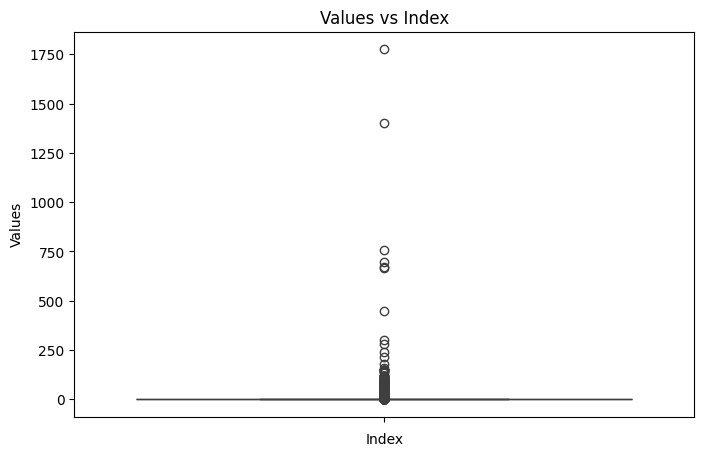

In [425]:
# Column 09 num_private # Since 75% values are zero better to drop this column
print("--------------------------------")
print(df["num_private"].describe()) # Print the description of the column
df["num_private"].isnull().sum() # Check if there are any null values in the column
plt.figure(figsize=(8,5))
sns.histplot(df["num_private"], bins=200,kde=True) # Plot the histogram of the column
plt.title("Histogram of num_private")
plt.xlabel("num_private")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(8,5))
plt.scatter(df.index, df['num_private'], color='blue', label='Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title("num_private vs Index")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(df["num_private"])
#sns.stripplot(df["num_private"], color="red", alpha=0.5)                  # Adds all points
plt.title("Boxplot of num_private")
# Labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values vs Index')
plt.show()

In [426]:
print("NaN value count:",df["basin"].isnull().sum())                # Check if there are any null values in the column
print(df['basin'].unique())


NaN value count: 0
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


In [427]:


# Column 10 basin # The column needs to be considered as data is ok..I used One Hot Encoding for this
print("NaN value count:",df["basin"].isnull().sum())                # Check if there are any null values in the column
df["basin"].describe() # Print the value counts of the column
print(df.basin.value_counts()) # Print the value counts of the column
print(df["basin"].head())
encoded_basin = ohe.fit_transform(df[['basin']])
encoded_basin_df = pd.DataFrame(encoded_basin, columns=ohe.get_feature_names_out(['basin']), index=df.index)  

print(encoded_basin_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_basin_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['basin'], inplace=True) # Drop the original column
df.head()



NaN value count: 0
basin
Lake Victoria              10237
Pangani                     8937
Rufiji                      7972
Internal                    7782
Lake Tanganyika             6430
Wami / Ruvu                 5985
Lake Nyasa                  5083
Ruvuma / Southern Coast     4489
Lake Rukwa                  2454
Name: count, dtype: int64
0                 Lake Nyasa
1              Lake Victoria
2                    Pangani
3    Ruvuma / Southern Coast
4              Lake Victoria
Name: basin, dtype: object
   basin_Internal  basin_Lake Nyasa  basin_Lake Rukwa  basin_Lake Tanganyika  \
0             0.0               1.0               0.0                    0.0   
1             0.0               0.0               0.0                    0.0   
2             0.0               0.0               0.0                    0.0   
3             0.0               0.0               0.0                    0.0   
4             0.0               0.0               0.0                    0.0   


id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ... target  \
0   0.496455  0.153923                  none            0  ...      0   
1   0.474167  0.815659              Zahanati            0  ...      0   
2   0.731374  0.671973           Kwa Mahundi            0  ...      0   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...      2   
4   0.141899  0.843309               Shuleni            0  ...      0   

  basin_Internal  basin_Lake Nyasa  basin_Lake Rukwa basin_Lake Tanganyika  \
0            0.0               1.0               0.0                   0.0   
1            0.0               0.0               0.0                   0.0   
2            0.0               0.0               0.0                   0.0   
3            0.0               0.0               0.0                   0.0   
4            0.0               0.0               0.0                   0.0   

  basin_Lake Victoria  basin_Pangani basin_Rufiji  \
0                 0.0            0.0          0.0   
1                 1.0            0.0          0.0   
2                 0.0            1.0          0.0   
3                 0.0            0.0          0.0   
4                 1.0            0.0          0.0   

  basin_Ruvuma / Southern Coast basin_Wami / Ruvu  
0                           0.0               0.0  
1                           0.0               0.0  
2                           0.0               0.0  
3                           1.0               0.0  
4                           0.0               0.0  

[5 rows x 49 columns]

In [428]:
# Column 11 subvillage # Since region code and district code gives same info 
                    # so ignore this because it has NaN and string to number 
                    # conversion is needed 
print("NaN count:",df["subvillage"].isnull().sum()) # Check if there are any null values in the column
print(df["subvillage"].describe()) # Print the value counts of the column
df["subvillage"].value_counts() # Print the value counts of the column
df["subvillage"].head()

"""

df['subvillage'] = df['subvillage'].fillna('Unknown')
encoded_subvillage = ohe.fit_transform(df[['subvillage']])
encoded_subvillage_df = pd.DataFrame(encoded_subvillage, columns=ohe.get_feature_names_out(['subvillage']), index=df.index)  

print(encoded_subvillage_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_subvillage_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
#df.drop(columns=['region'], inplace=True) # Drop the original column
#df.head()
"""

NaN count: 371
count        58998
unique       19281
top       Madukani
freq           508
Name: subvillage, dtype: object


"\n\ndf['subvillage'] = df['subvillage'].fillna('Unknown')\nencoded_subvillage = ohe.fit_transform(df[['subvillage']])\nencoded_subvillage_df = pd.DataFrame(encoded_subvillage, columns=ohe.get_feature_names_out(['subvillage']), index=df.index)  \n\nprint(encoded_subvillage_df.head(5)) # Print the first 5 rows of the encoded dataframe\ndf = pd.concat([df, encoded_subvillage_df], axis=1) # Concatenate the original dataframe with the encoded dataframe\n#df.drop(columns=['region'], inplace=True) # Drop the original column\n#df.head()\n"

In [429]:
#import pandas as pd
#df=pd.read_csv("Training_Set_Values.csv")    # Read the CSV file
print(df[pd.isna(df["region"])][['subvillage','region','region_code','district_code','lga','ward']])# Print the first 10 rows of the dataframe where region is Kigoma

Empty DataFrame
Columns: [subvillage, region, region_code, district_code, lga, ward]
Index: []


In [430]:
# Column 12 region # Since region code and district code gives same info 
                    # so ignore this because string to number 
                    # conversion is needed
print("NaN count:", df["region"].isnull().sum())           # Check if there are any null values in the column
print(df["region"].describe())                             # Print the description of the column
df["region"].value_counts()                                # Print the value counts of the column

print(df['region'].nunique())

"""

encoded_region = ohe.fit_transform(df[['region']])
encoded_region_df = pd.DataFrame(encoded_region, columns=ohe.get_feature_names_out(['region']), index=df.index)  

print(encoded_region_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_region_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
#df.drop(columns=['region'], inplace=True) # Drop the original column
df.head()
"""

NaN count: 0
count      59369
unique        21
top       Iringa
freq        5293
Name: region, dtype: object
21


"\n\nencoded_region = ohe.fit_transform(df[['region']])\nencoded_region_df = pd.DataFrame(encoded_region, columns=ohe.get_feature_names_out(['region']), index=df.index)  \n\nprint(encoded_region_df.head(5)) # Print the first 5 rows of the encoded dataframe\ndf = pd.concat([df, encoded_region_df], axis=1) # Concatenate the original dataframe with the encoded dataframe\n#df.drop(columns=['region'], inplace=True) # Drop the original column\ndf.head()\n"

In [431]:
#Column 13 region_code # Since it has 27 unique codes i chose to use one hot encoding.
                    
print("NaN count",df["region_code"].isnull().sum()) # Check if there are any null values in the column
print("Unique values:",df["region_code"].nunique()) # Print the distinct values of the column
print(df["region_code"].describe()) # Print the value counts of the column
df["region_code"].value_counts() # Print the first 5 rows of the column



"""
encoded_region_code = ohe.fit_transform(df[['region_code']])
encoded_region_code_df = pd.DataFrame(encoded_region_code, columns=ohe.get_feature_names_out(['region_code']), index=df.index)  

print(encoded_region_code_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_region_code_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['region_code'], inplace=True) # Drop the original column
df.head()
"""

NaN count 0
Unique values: 27
count    59369.000000
mean        15.290977
std         17.578962
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64


"\nencoded_region_code = ohe.fit_transform(df[['region_code']])\nencoded_region_code_df = pd.DataFrame(encoded_region_code, columns=ohe.get_feature_names_out(['region_code']), index=df.index)  \n\nprint(encoded_region_code_df.head(5)) # Print the first 5 rows of the encoded dataframe\ndf = pd.concat([df, encoded_region_code_df], axis=1) # Concatenate the original dataframe with the encoded dataframe\ndf.drop(columns=['region_code'], inplace=True) # Drop the original column\ndf.head()\n"

In [432]:
# Column 14 district_code # Since has 20 unique codes i chose to use one hot encoding.
                    
print("NaN count",df["district_code"].isnull().sum()) # Check if there are any null values in the column
print("Unique values:",df["district_code"].nunique()) # Print the distinct values of the column

print(df["district_code"].describe()) # Print the value counts of the column
print("code vs freq",df["district_code"].value_counts()) # Print the value counts of the column
df["district_code"].head() # Print the first 5 rows of the column



"""
encoded_district_code = ohe.fit_transform(df[['district_code']])
encoded_district_code_df = pd.DataFrame(encoded_district_code, columns=ohe.get_feature_names_out(['district_code']), index=df.index)  

print(encoded_district_code_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_district_code_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['district_code'], inplace=True) # Drop the original column
df.head()
"""



NaN count 0
Unique values: 20
count    59369.000000
mean         5.627196
std          9.631542
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: district_code, dtype: float64
code vs freq district_code
1     12199
2     11169
3      9995
4      8994
5      4355
6      4074
7      3339
8      1040
30      994
33      868
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: count, dtype: int64


"\nencoded_district_code = ohe.fit_transform(df[['district_code']])\nencoded_district_code_df = pd.DataFrame(encoded_district_code, columns=ohe.get_feature_names_out(['district_code']), index=df.index)  \n\nprint(encoded_district_code_df.head(5)) # Print the first 5 rows of the encoded dataframe\ndf = pd.concat([df, encoded_district_code_df], axis=1) # Concatenate the original dataframe with the encoded dataframe\ndf.drop(columns=['district_code'], inplace=True) # Drop the original column\ndf.head()\n"

In [433]:
# Column 15 lga # No NaN, 125 unique values, used normalized frequency encoding
print("NaN count:",df["lga"].isnull().sum())# Print the value counts of the column
print("Unique values:",df["lga"].nunique())# Print the value counts of the column
print(df["lga"].describe()) # Print the description of the column
print(df["lga"].head()) # Print the description of the column
#freq_encoding=df["lga"].value_counts(normalize=True) # Frequency Encoding for lga column
#df["lga"]=df["lga"].map(freq_encoding) # Map the frequencies to the original column
df["lga"].head()


NaN count: 0
Unique values: 125
count      59369
unique       125
top       Njombe
freq        2502
Name: lga, dtype: object
0       Ludewa
1    Serengeti
2    Simanjiro
3     Nanyumbu
4      Karagwe
Name: lga, dtype: object


0       Ludewa
1    Serengeti
2    Simanjiro
3     Nanyumbu
4      Karagwe
Name: lga, dtype: object

In [434]:
# Column 16 ward # No NaN, 2092 unique values, used normalized frequency encoding
print("NaN count:",df["ward"].isnull().sum())# Print the value counts of the column
print("Unique values:",df["ward"].nunique())# Print the value counts of the column
print(df["ward"].describe()) # Print the description of the column
#print(df["ward"].head()) # Print the description of the column
#freq_encoding=df["ward"].value_counts(normalize=True) # Frequency Encoding for ward column
#df["ward_freq"]=df["ward"].map(freq_encoding) # Map the frequencies to the original column
df["ward"].head()


NaN count: 0
Unique values: 2092
count     59369
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object


0      Mundindi
1         Natta
2       Ngorika
3      Nanyumbu
4    Nyakasimbi
Name: ward, dtype: object

NaN count: 0
Median 25.0
count    59369.000000
mean       179.924135
std        471.574270
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64


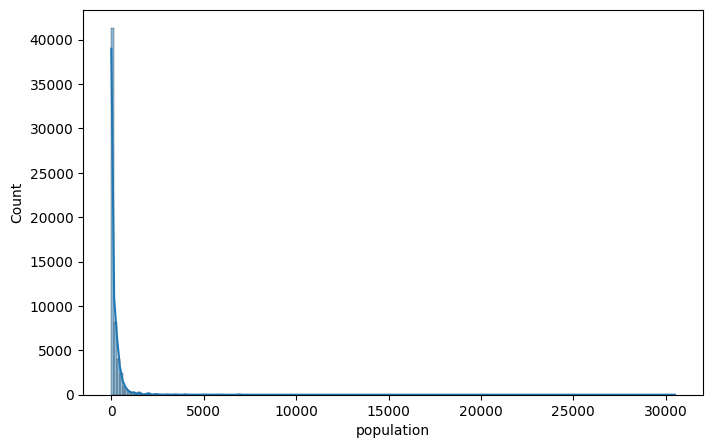

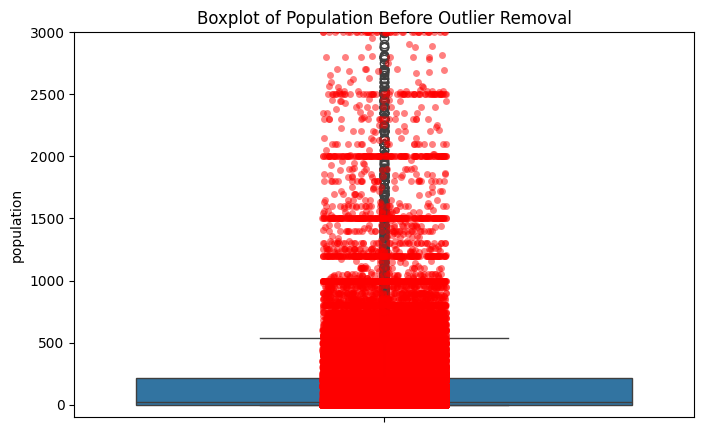

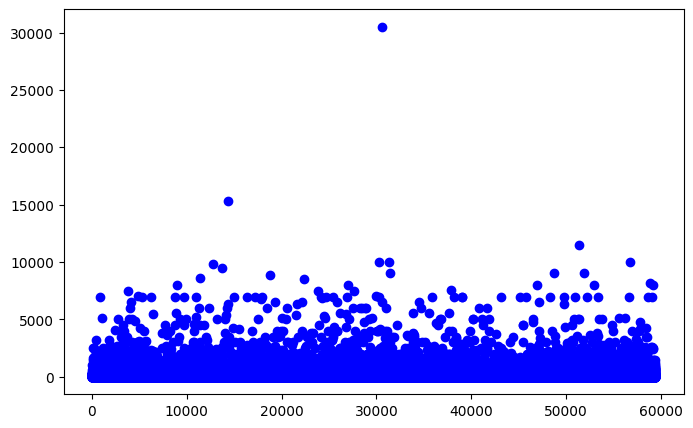

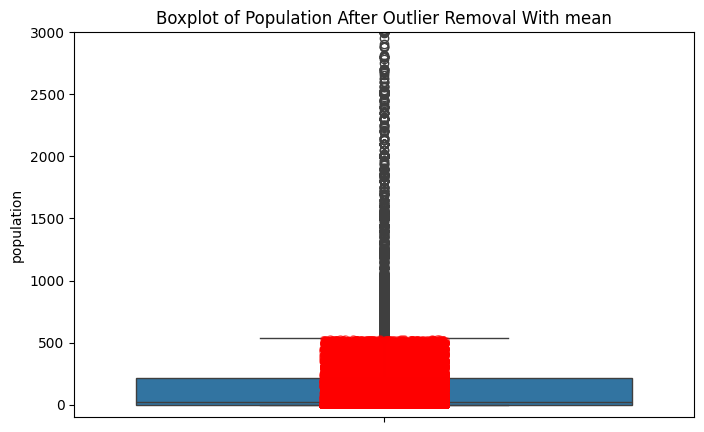

'\n\n\nprint(\'Nan count in population_outlier_replaced_NaN:\',df[\'population_outlier_replaced_NaN\'].isnull().sum()) # Check if there are any null values in the column\ndf[\'population_outlier_replaced_mean\'] = df.groupby(\'ward\')[\'population_outlier_replaced_NaN\'].transform(\n    lambda x: x.fillna(x.mean())\n)\nprint("NaN count after imputaion: ",df[\'population_outlier_replaced_mean\'].isnull().sum()) # Check if there are any null values in the column\n\n\n'

In [435]:
# Column 17 population
print('NaN count:',df['population'].isnull().sum()) # Check if there are any null values in the column
#print('Unique values',df['population'].value_counts()) # Print the value counts of the column
print('Median',df['population'].median()) # Print the median of the column
print(df['population'].describe())
plt.figure(figsize=(8,5))
sns.histplot(df["population"], bins=200, kde=True) # Plot the histogram of the column
plt.figure(figsize=(8,5))
sns.boxplot(df["population"])
sns.stripplot(df["population"], color="red", alpha=0.5)                  # Adds all points
plt.ylim(-100,3000)
plt.title("Boxplot of Population Before Outlier Removal")
plt.show() # Show the plot
plt.figure(figsize=(8,5))
plt.scatter(df.index, df['population'], color='blue', label='Values')
plt.show() # Show the plot

# Remove the outliers from the population column
Q1=df["population"].quantile(0.25) # 25th percentile
Q3=df["population"].quantile(0.75) # 75th percentile
IQR=Q3-Q1 # Interquartile range
Lower_bound_population=Q1-1.5*IQR # Lower bound
Upper_bound_population=Q3+1.5*IQR # Upper bound
mean_population=df["population"].mean() # Mean value

df["population_outlier_replaced_mean"]=df["population"].apply(lambda x:x if ((x>=Lower_bound_population) & (x<=Upper_bound_population)) else mean_population) # Replace outliers with median value

plt.figure(figsize=(8,5))
sns.boxplot(y=df["population"])
sns.stripplot(y=df["population_outlier_replaced_mean"], color="red", alpha=0.5)
plt.ylim(-100,3000)
plt.title("Boxplot of Population After Outlier Removal With mean")
plt.show() # Show the plot

df["population"] = df["population_outlier_replaced_mean"] # Replace original population with processed values
df.drop("population_outlier_replaced_mean", axis=1, inplace=True) # Drop the intermediate column

"""


print('Nan count in population_outlier_replaced_NaN:',df['population_outlier_replaced_NaN'].isnull().sum()) # Check if there are any null values in the column
df['population_outlier_replaced_mean'] = df.groupby('ward')['population_outlier_replaced_NaN'].transform(
    lambda x: x.fillna(x.mean())
)
print("NaN count after imputaion: ",df['population_outlier_replaced_mean'].isnull().sum()) # Check if there are any null values in the column


"""




In [436]:
#Column 18 public_meeting # 3328 NaN values replaced with string Unknown, One Hot Encoding used
print(df['public_meeting'].value_counts())                   # Print the value counts of the column
print('Nan count',df['public_meeting'].isnull().sum())                         # Check if there are any null values in the column)
df['public_meeting']=df['public_meeting'].fillna('Unknown')  # Fill NaN values with 'Unknown'
print(df['public_meeting'].value_counts())                   # Print the value counts of the column


df['public_meeting']=df['public_meeting'].astype(str)
encoded_public_meeting = ohe.fit_transform(df[['public_meeting']])
encoded_public_meeting_df = pd.DataFrame(encoded_public_meeting, columns=ohe.get_feature_names_out(['public_meeting']), index=df.index)  

print(encoded_public_meeting_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_public_meeting_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['public_meeting'], inplace=True) # Drop the original column
df.head()



public_meeting
True     50988
False     5053
Name: count, dtype: int64
Nan count 3328
public_meeting
True       50988
False       5053
Unknown     3328
Name: count, dtype: int64
   public_meeting_False  public_meeting_True  public_meeting_Unknown
0                   0.0                  1.0                     0.0
1                   0.0                  0.0                     1.0
2                   0.0                  1.0                     0.0
3                   0.0                  1.0                     0.0
4                   0.0                  1.0                     0.0


id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  basin_Lake Rukwa basin_Lake Tanganyika  basin_Lake Victoria  basin_Pangani  \
0              0.0                   0.0                  0.0            0.0   
1              0.0                   0.0                  1.0            0.0   
2              0.0                   0.0                  0.0            1.0   
3              0.0                   0.0                  0.0            0.0   
4              0.0                   0.0                  1.0            0.0   

  basin_Rufiji basin_Ruvuma / Southern Coast  basin_Wami / Ruvu  \
0          0.0                           0.0                0.0   
1          0.0                           0.0                0.0   
2          0.0                           0.0                0.0   
3          0.0                           1.0                0.0   
4          0.0                           0.0                0.0   

  public_meeting_False public_meeting_True public_meeting_Unknown  
0                  0.0                 1.0                    0.0  
1                  0.0                 0.0                    1.0  
2                  0.0                 1.0                    0.0  
3                  0.0                 1.0                    0.0  
4                  0.0                 1.0                    0.0  

[5 rows x 51 columns]

In [437]:
# Column 19 recorded_by # All values are "GeoData Consultants Ltd" ignore this column
print('Nan count:',df['recorded_by'].isnull().sum()) # Check if there are any null values in the column
df['recorded_by'].describe() # Print the value counts of the column
print('Unique values:',df['recorded_by'].nunique()) # Print the value counts of the column
print(df['recorded_by'].describe())
df.columns


Nan count: 0
Unique values: 1
count                       59369
unique                          1
top       GeoData Consultants Ltd
freq                        59369
Name: recorded_by, dtype: object


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'target',
       'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'public_meeting_False', 'public_meeting_True',
       'public_meeting_Unknown'],
      dtype='object')

In [438]:
# Column 20 scheme_management # could not decide about this column..drop/keep
print('Nan count',df['scheme_management'].isnull().sum())
#print(df['scheme_name'].nunique())
print(df['scheme_management'].value_counts())
print('Unique values',df['scheme_management'].nunique())

#pd.crosstab(df['scheme_name'],df['scheme_management'])
pd.set_option("display.max_rows", None)
print(df[df['scheme_management'].isna()][['scheme_management','scheme_name']]) 

Nan count 3874
scheme_management
VWC                 36771
WUG                  5204
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1679
Private operator     1062
Company              1061
Other                 765
SWC                    97
Trust                  72
Name: count, dtype: int64
Unique values 11
      scheme_management                            scheme_name
4                   NaN                                    NaN
7                   NaN                                    NaN
9                   NaN                                    NaN
18                  NaN                                    NaN
27                  NaN                                    NaN
35                  NaN                                    NaN
54                  NaN                                    NaN
70                  NaN                                    NaN
87                  NaN                                      B
128     

In [439]:
#Column 21 scheme_name # Nan count is 28790..almost 50 percemt so ignore the column
print('Nan count:',df['scheme_name'].isnull().sum()) # Check if there are any null values in the column
df['scheme_name'].describe() # Print the value counts of the column

Nan count: 28790


count     30579
unique     2695
top           K
freq        681
Name: scheme_name, dtype: object

In [440]:
# Column 22 permit # NaN replaced with unknown and 1 hot encdoing is used
print('Nan count:',df['permit'].isnull().sum()) # Check if there are any null values in the column
print(df['permit'].describe())
print('value count:',df['permit'].value_counts())
df['permit']=df['permit'].fillna('Unknown')
print('Nan count:',df['permit'].isnull().sum()) # Check if there are any null values in the column
print('value count:',df['permit'].value_counts())


df['permit']=df['permit'].astype(str)
encoded_permit = ohe.fit_transform(df[['permit']])
encoded_permit_df = pd.DataFrame(encoded_permit, columns=ohe.get_feature_names_out(['permit']), index=df.index)  

print(encoded_permit_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_permit_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['permit'], inplace=True) # Drop the original column
df.head()



Nan count: 3055
count     56314
unique        2
top        True
freq      38834
Name: permit, dtype: object
value count: permit
True     38834
False    17480
Name: count, dtype: int64
Nan count: 0
value count: permit
True       38834
False      17480
Unknown     3055
Name: count, dtype: int64
   permit_False  permit_True  permit_Unknown
0           1.0          0.0             0.0
1           0.0          1.0             0.0
2           0.0          1.0             0.0
3           0.0          1.0             0.0
4           0.0          1.0             0.0


id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ... basin_Pangani  \
0   0.496455  0.153923                  none            0  ...           0.0   
1   0.474167  0.815659              Zahanati            0  ...           0.0   
2   0.731374  0.671973           Kwa Mahundi            0  ...           1.0   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...           0.0   
4   0.141899  0.843309               Shuleni            0  ...           0.0   

  basin_Rufiji  basin_Ruvuma / Southern Coast  basin_Wami / Ruvu  \
0          0.0                            0.0                0.0   
1          0.0                            0.0                0.0   
2          0.0                            0.0                0.0   
3          0.0                            1.0                0.0   
4          0.0                            0.0                0.0   

  public_meeting_False public_meeting_True  public_meeting_Unknown  \
0                  0.0                 1.0                     0.0   
1                  0.0                 0.0                     1.0   
2                  0.0                 1.0                     0.0   
3                  0.0                 1.0                     0.0   
4                  0.0                 1.0                     0.0   

  permit_False permit_True permit_Unknown  
0          1.0         0.0            0.0  
1          0.0         1.0            0.0  
2          0.0         1.0            0.0  
3          0.0         1.0            0.0  
4          0.0         1.0            0.0  

[5 rows x 53 columns]

In [441]:
#Column 23 construction_year # 1/3 values are zero.replaced with median of nonzero values
print('Nan count:',df['construction_year'].isnull().sum()) # Check if there are any null values in the column
print(df['construction_year'].value_counts().head(6)) # Print the value counts of the column
print('unique values:',df['construction_year'].unique()) # Print the value counts of the column
#pd.crosstab(df['construction_year'],df['target'])

nonzero_median = df.loc[df['construction_year'] != 0, 'construction_year'].median()
print('Nonzero median',nonzero_median)

# Step 2: Replace 0s with that median
df['construction_year'] = df['construction_year'].replace(0, nonzero_median)
print(df['construction_year'].value_counts().head(6)) # Print the value counts of the column


Nan count: 0
construction_year
0       20695
2010     2645
2008     2611
2009     2530
2000     2091
2007     1586
Name: count, dtype: int64
unique values: [1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]
Nonzero median 2000.0
construction_year
2000    22786
2010     2645
2008     2611
2009     2530
2007     1586
2006     1470
Name: count, dtype: int64


In [442]:
# Columns [extraction_type, extraction_type_group, extraction_type_class]
# Based on anlysis, Extraction type is the deatiled version of other two columns 
# extraction type with 18 caregories
# extraction_type_group with 13 caregories
# extraction_type_classwith 7 caregories

# I decided to drop two columns [extraction_type_group, extraction_type_class]
# use column ['extraction_type']
# Since 'extraction_type' has 0 NaN values and 18 unique values, use one hot encoding

print('--------------------------------------------------------')
print('Nan count',df['extraction_type'].isnull().sum()) # Check if there are any null values in the column
print('Unique values',df['extraction_type'].nunique()) # Check if there are any null values in the column
print('--------------------------------------------------------')


encoded_extraction_type = ohe.fit_transform(df[['extraction_type']])
encoded_extraction_type_df = pd.DataFrame(encoded_extraction_type, columns=ohe.get_feature_names_out(['extraction_type']), index=df.index)  

print(encoded_extraction_type_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_extraction_type_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['extraction_type'], inplace=True) # Drop the original column
df.head()





--------------------------------------------------------
Nan count 0
Unique values 18
--------------------------------------------------------
   extraction_type_afridev  extraction_type_cemo  extraction_type_climax  \
0                      0.0                   0.0                     0.0   
1                      0.0                   0.0                     0.0   
2                      0.0                   0.0                     0.0   
3                      0.0                   0.0                     0.0   
4                      0.0                   0.0                     0.0   

   extraction_type_gravity  extraction_type_india mark ii  \
0                      1.0                            0.0   
1                      1.0                            0.0   
2                      1.0                            0.0   
3                      0.0                            0.0   
4                      1.0                            0.0   

   extraction_type_india mark iii

id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  extraction_type_nira/tanira extraction_type_other  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                         0.0                   0.0   
3                         0.0                   0.0   
4                         0.0                   0.0   

   extraction_type_other - mkulima/shinyanga  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   extraction_type_other - play pump extraction_type_other - rope pump  \
0                                0.0                               0.0   
1                                0.0                               0.0   
2                                0.0                               0.0   
3                                0.0                               0.0   
4                                0.0                               0.0   

  extraction_type_other - swn 81  extraction_type_submersible  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          1.0   
4                            0.0                          0.0   

  extraction_type_swn 80 extraction_type_walimi extraction_type_windmill  
0                    0.0                    0.0                      0.0  
1                    0.0                    0.0                      0.0  
2                    0.0                    0.0                      0.0  
3                    0.0                    0.0                      0.0  
4                    0.0                    0.0                      0.0  

[5 rows x 70 columns]

In [443]:
# Column 27, 28 ['management', 'management_group'] # No NaN Values.
# 12 unique values in management
# 5 unique values in management_group
# managment is the detailed version of management_group
# I decided to drop the column management_group and use management column only
# Used one hot encoding for both columns
                                           
print('--------------------------------------------------------')
print('Nan count in management column',df['management'].isnull().sum())                         # Check if there are any null values in the column
print('value_counts in management column',df['management'].value_counts())                      # Print the value counts of the column
print('Unique values in management column',df['management'].nunique())                          # Print the number of unique values in the column
print('--------------------------------------------------------')

encoded_management = ohe.fit_transform(df[['management']])
encoded_management_df = pd.DataFrame(encoded_management, columns=ohe.get_feature_names_out(['management']), index=df.index)  

print(encoded_management_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_management_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['management'], inplace=True) # Drop the original column
df.head()


--------------------------------------------------------
Nan count in management column 0
value_counts in management column management
vwc                 40484
wug                  6511
water board          2933
wua                  2535
private operator     1970
parastatal           1767
water authority       904
other                 843
company               685
unknown               560
other - school         99
trust                  78
Name: count, dtype: int64
Unique values in management column 12
--------------------------------------------------------
   management_company  management_other  management_other - school  \
0                 0.0               0.0                        0.0   
1                 0.0               0.0                        0.0   
2                 0.0               0.0                        0.0   
3                 0.0               0.0                        0.0   
4                 0.0               1.0                        0.0   

   manageme

id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  management_other - school management_parastatal  \
0                       0.0                   0.0   
1                       0.0                   0.0   
2                       0.0                   0.0   
3                       0.0                   0.0   
4                       0.0                   0.0   

   management_private operator  management_trust management_unknown  \
0                          0.0               0.0                0.0   
1                          0.0               0.0                0.0   
2                          0.0               0.0                0.0   
3                          0.0               0.0                0.0   
4                          0.0               0.0                0.0   

  management_vwc  management_water authority management_water board  \
0            1.0                         0.0                    0.0   
1            0.0                         0.0                    0.0   
2            1.0                         0.0                    0.0   
3            1.0                         0.0                    0.0   
4            0.0                         0.0                    0.0   

  management_wua management_wug  
0            0.0            0.0  
1            0.0            1.0  
2            0.0            0.0  
3            0.0            0.0  
4            0.0            0.0  

[5 rows x 81 columns]

In [444]:

# Columns 29, 30 ['payment', 'payment_type']
# No Nan values and 07 Unique categories in both columns
# Semantically same values in both columns
# After mapping(staderdization) choose one column i.e payment,
# One hot encoding is used for payment column
print(df['payment'].value_counts()) #
print('--------------------------------------------------------')
print(df['payment_type'].value_counts()) # Check if there are any null values in the column

# The values in the two columns semantically are almost same just differet wording

encoded_payment = ohe.fit_transform(df[['payment']])
encoded_payment_df = pd.DataFrame(encoded_payment, columns=ohe.get_feature_names_out(['payment']), index=df.index)  

print(encoded_payment_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_payment_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['payment'], inplace=True) # Drop the original column
df.head()

payment
never pay                25331
pay per bucket            8981
pay monthly               8300
unknown                   8149
pay when scheme fails     3912
pay annually              3642
other                     1054
Name: count, dtype: int64
--------------------------------------------------------
payment_type
never pay     25331
per bucket     8981
monthly        8300
unknown        8149
on failure     3912
annually       3642
other          1054
Name: count, dtype: int64
   payment_never pay  payment_other  payment_pay annually  \
0                0.0            0.0                   1.0   
1                1.0            0.0                   0.0   
2                0.0            0.0                   0.0   
3                1.0            0.0                   0.0   
4                1.0            0.0                   0.0   

   payment_pay monthly  payment_pay per bucket  payment_pay when scheme fails  \
0                  0.0                     0.0                   

id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  management_water board management_wua  management_wug  payment_never pay  \
0                    0.0            0.0             0.0                0.0   
1                    0.0            0.0             1.0                1.0   
2                    0.0            0.0             0.0                0.0   
3                    0.0            0.0             0.0                1.0   
4                    0.0            0.0             0.0                1.0   

  payment_other payment_pay annually  payment_pay monthly  \
0           0.0                  1.0                  0.0   
1           0.0                  0.0                  0.0   
2           0.0                  0.0                  0.0   
3           0.0                  0.0                  0.0   
4           0.0                  0.0                  0.0   

  payment_pay per bucket payment_pay when scheme fails payment_unknown  
0                    0.0                           0.0             0.0  
1                    0.0                           0.0             0.0  
2                    1.0                           0.0             0.0  
3                    0.0                           0.0             0.0  
4                    0.0                           0.0             0.0  

[5 rows x 87 columns]

In [445]:
# Columns 31, 32 ['water_quality', 'quality_group']
# Based on the value_counts water_quality is the detailed version of quality_group
# No NaN values in both columns
# 8 categories in water_quality and 6 categories in quality_group
# I chose one hot encoding for water quality and decided to drop quality_group column
#print(df['water_quality'].head())
print('--------------------------------------------------------')
print(df['water_quality'].value_counts()) # Check if there are any null values in the column
print('Nan count in water quality:',df['water_quality'].isnull().sum()) # Check if there are any null values in the column
print('--------------------------------------------------------')

encoded_water_quality = ohe.fit_transform(df[['water_quality']])
encoded_water_quality_df = pd.DataFrame(encoded_water_quality, columns=ohe.get_feature_names_out(['water_quality']), index=df.index)  

print(encoded_water_quality_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_water_quality_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['water_quality'], inplace=True) # Drop the original column
df.head()

--------------------------------------------------------
water_quality
soft                  50793
salty                  4853
unknown                1875
milky                   803
coloured                490
salty abandoned         338
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64
Nan count in water quality: 0
--------------------------------------------------------
   water_quality_coloured  water_quality_fluoride  \
0                     0.0                     0.0   
1                     0.0                     0.0   
2                     0.0                     0.0   
3                     0.0                     0.0   
4                     0.0                     0.0   

   water_quality_fluoride abandoned  water_quality_milky  water_quality_salty  \
0                               0.0                  0.0                  0.0   
1                               0.0                  0.0                  0.0   
2                             

id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  payment_pay when scheme fails payment_unknown  water_quality_coloured  \
0                           0.0             0.0                     0.0   
1                           0.0             0.0                     0.0   
2                           0.0             0.0                     0.0   
3                           0.0             0.0                     0.0   
4                           0.0             0.0                     0.0   

   water_quality_fluoride water_quality_fluoride abandoned  \
0                     0.0                              0.0   
1                     0.0                              0.0   
2                     0.0                              0.0   
3                     0.0                              0.0   
4                     0.0                              0.0   

  water_quality_milky  water_quality_salty water_quality_salty abandoned  \
0                 0.0                  0.0                           0.0   
1                 0.0                  0.0                           0.0   
2                 0.0                  0.0                           0.0   
3                 0.0                  0.0                           0.0   
4                 0.0                  0.0                           0.0   

  water_quality_soft water_quality_unknown  
0                1.0                   0.0  
1                1.0                   0.0  
2                1.0                   0.0  
3                1.0                   0.0  
4                1.0                   0.0  

[5 rows x 94 columns]

In [446]:
# Columns 33,34 ['quantity', 'quantity_group'] are same
# No Nan Values in both columns
# 5 categories in both columns
# I chose to keep quantity column and drop quantity_group column
# 1 hot encoding is used for quantity column

print(df['quantity'].head()) 
print(df['quantity'].value_counts()) # Check if there are any null values in the column
print('Nan count in quantity',df['quantity'].isnull().sum()) # Check if there are any null values in the column

print('---------------------------------------------------------')


encoded_quantity = ohe.fit_transform(df[['quantity']])
encoded_quantity_df = pd.DataFrame(encoded_quantity, columns=ohe.get_feature_names_out(['quantity']), index=df.index)  

print(encoded_quantity_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_quantity_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['quantity'], inplace=True) # Drop the original column
df.head()


0          enough
1    insufficient
2          enough
3             dry
4        seasonal
Name: quantity, dtype: object
quantity
enough          33171
insufficient    15122
dry              6241
seasonal         4047
unknown           788
Name: count, dtype: int64
Nan count in quantity 0
---------------------------------------------------------
   quantity_dry  quantity_enough  quantity_insufficient  quantity_seasonal  \
0           0.0              1.0                    0.0                0.0   
1           0.0              0.0                    1.0                0.0   
2           0.0              1.0                    0.0                0.0   
3           1.0              0.0                    0.0                0.0   
4           0.0              0.0                    0.0                1.0   

   quantity_unknown  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  water_quality_milky water_quality_salty  water_quality_salty abandoned  \
0                 0.0                 0.0                            0.0   
1                 0.0                 0.0                            0.0   
2                 0.0                 0.0                            0.0   
3                 0.0                 0.0                            0.0   
4                 0.0                 0.0                            0.0   

   water_quality_soft water_quality_unknown quantity_dry  quantity_enough  \
0                 1.0                   0.0          0.0              1.0   
1                 1.0                   0.0          0.0              0.0   
2                 1.0                   0.0          0.0              1.0   
3                 1.0                   0.0          1.0              0.0   
4                 1.0                   0.0          0.0              0.0   

  quantity_insufficient quantity_seasonal quantity_unknown  
0                   0.0               0.0              0.0  
1                   1.0               0.0              0.0  
2                   0.0               0.0              0.0  
3                   0.0               0.0              0.0  
4                   0.0               1.0              0.0  

[5 rows x 98 columns]

In [447]:
# Columns 35, 36 ['source', 'source_type']
# No NaN values in both columns
# 'source' is the detailed version of 'source_type'
# 10 categories in source and 7 categories in source_type
# I chose to keep source column and drop source_type column
# 1 hot encoding is used for source column
print('---------------------------------------------------------')
print(df['source'].value_counts()) # Check if there are any null values in the column
print('Nan count in source',df['source'].isnull().sum()) # Check if there are any null values in the column
print('---------------------------------------------------------')


encoded_source = ohe.fit_transform(df[['source']])
encoded_source_df = pd.DataFrame(encoded_source, columns=ohe.get_feature_names_out(['source']), index=df.index)  

print(encoded_source_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_source_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['source'], inplace=True) # Drop the original column
df.head()

---------------------------------------------------------
source
spring                  17010
shallow well            16810
machine dbh             11075
river                    9610
rainwater harvesting     2293
hand dtw                  873
lake                      764
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64
Nan count in source 0
---------------------------------------------------------
   source_dam  source_hand dtw  source_lake  source_machine dbh  source_other  \
0         0.0              0.0          0.0                 0.0           0.0   
1         0.0              0.0          0.0                 0.0           0.0   
2         1.0              0.0          0.0                 0.0           0.0   
3         0.0              0.0          0.0                 1.0           0.0   
4         0.0              0.0          0.0                 0.0           0.0   

   source_rainwater harvesting  source_riv

id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ... source_dam  \
0   0.496455  0.153923                  none            0  ...        0.0   
1   0.474167  0.815659              Zahanati            0  ...        0.0   
2   0.731374  0.671973           Kwa Mahundi            0  ...        1.0   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...        0.0   
4   0.141899  0.843309               Shuleni            0  ...        0.0   

  source_hand dtw  source_lake  source_machine dbh source_other  \
0             0.0          0.0                 0.0          0.0   
1             0.0          0.0                 0.0          0.0   
2             0.0          0.0                 0.0          0.0   
3             0.0          0.0                 1.0          0.0   
4             0.0          0.0                 0.0          0.0   

  source_rainwater harvesting  source_river source_shallow well source_spring  \
0                         0.0           0.0                 0.0           1.0   
1                         1.0           0.0                 0.0           0.0   
2                         0.0           0.0                 0.0           0.0   
3                         0.0           0.0                 0.0           0.0   
4                         1.0           0.0                 0.0           0.0   

  source_unknown  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 107 columns]

In [448]:
# Column 37 ['source_class']
# No Nan values in the column
# 3 categories in the column
# 1 hot encoding is used for source_class column
print(df['source_class'].head()) # Print the first 5 rows of the column
print('---------------------------------------------------------')
#print(pd.crosstab(df['source_class'],df['source_type'])) # Print the cross tabulation of source and source_type columns
print(df['source_class'].value_counts()) # Check if there are any null values in the column
print('Nan count in source class',df['source_class'].isnull().sum()) # Check if there are any null values in the column
print('---------------------------------------------------------')


encoded_source_class = ohe.fit_transform(df[['source_class']])
encoded_source_class_df = pd.DataFrame(encoded_source_class, columns=ohe.get_feature_names_out(['source_class']), index=df.index)  

print(encoded_source_class_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_source_class_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['source_class'], inplace=True) # Drop the original column
df.head()


0    groundwater
1        surface
2        surface
3    groundwater
4        surface
Name: source_class, dtype: object
---------------------------------------------------------
source_class
groundwater    45768
surface        13323
unknown          278
Name: count, dtype: int64
Nan count in source class 0
---------------------------------------------------------
   source_class_groundwater  source_class_surface  source_class_unknown
0                       1.0                   0.0                   0.0
1                       0.0                   1.0                   0.0
2                       0.0                   1.0                   0.0
3                       1.0                   0.0                   0.0
4                       0.0                   1.0                   0.0


id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  source_machine dbh source_other  source_rainwater harvesting  source_river  \
0                0.0          0.0                          0.0           0.0   
1                0.0          0.0                          1.0           0.0   
2                0.0          0.0                          0.0           0.0   
3                1.0          0.0                          0.0           0.0   
4                0.0          0.0                          1.0           0.0   

  source_shallow well source_spring  source_unknown source_class_groundwater  \
0                 0.0           1.0             0.0                      1.0   
1                 0.0           0.0             0.0                      0.0   
2                 0.0           0.0             0.0                      0.0   
3                 0.0           0.0             0.0                      1.0   
4                 0.0           0.0             0.0                      0.0   

  source_class_surface source_class_unknown  
0                  0.0                  0.0  
1                  1.0                  0.0  
2                  1.0                  0.0  
3                  0.0                  0.0  
4                  1.0                  0.0  

[5 rows x 109 columns]

In [449]:
# Columns 38, 39 ['waterpoint_type', 'waterpoint_type_group'] have same info
# 'waterpoint_type' is the detailed version of 'waterpoint_type_group'
# No NaN values in both columns
# 7 categories in waterpoint_type and 6 categories in waterpoint_type_group
# I chose to keep waterpoint_type column and drop waterpoint_type_group column
# 1 hot encoding is used for waterpoint_type column
print(df['waterpoint_type'].head()) 
print('---------------------------------------------------------')
print(df['waterpoint_type'].value_counts()) # Check if there are any null values in the column
print('Nan count in waterpoint type',df['waterpoint_type'].isnull().sum()) # Check if there are any null values in the column

print('---------------------------------------------------------')


encoded_waterpoint_type = ohe.fit_transform(df[['waterpoint_type']])
encoded_waterpoint_type_df = pd.DataFrame(encoded_waterpoint_type, columns=ohe.get_feature_names_out(['waterpoint_type']), index=df.index)  

print(encoded_waterpoint_type_df.head(5)) # Print the first 5 rows of the encoded dataframe
df = pd.concat([df, encoded_waterpoint_type_df], axis=1) # Concatenate the original dataframe with the encoded dataframe
df.drop(columns=['waterpoint_type'], inplace=True) # Drop the original column
df.head()


0             communal standpipe
1             communal standpipe
2    communal standpipe multiple
3    communal standpipe multiple
4             communal standpipe
Name: waterpoint_type, dtype: object
---------------------------------------------------------
waterpoint_type
communal standpipe             28515
hand pump                      17477
other                           6372
communal standpipe multiple     6099
improved spring                  783
cattle trough                    116
dam                                7
Name: count, dtype: int64
Nan count in waterpoint type 0
---------------------------------------------------------
   waterpoint_type_cattle trough  waterpoint_type_communal standpipe  \
0                            0.0                                 1.0   
1                            0.0                                 1.0   
2                            0.0                                 0.0   
3                            0.0                              

id  amount_tsh  date_recorded        funder  gps_height     installer  \
0  69572      6000.0           2011         Roman        1390         Roman   
1   8776         0.0           2013       Grumeti        1399       GRUMETI   
2  34310        25.0           2013  Lottery Club         686  World vision   
3  67743         0.0           2013        Unicef         263        UNICEF   
4  19728         0.0           2011   Action In A           0       Artisan   

   longitude  latitude              wpt_name  num_private  ...  \
0   0.496455  0.153923                  none            0  ...   
1   0.474167  0.815659              Zahanati            0  ...   
2   0.731374  0.671973           Kwa Mahundi            0  ...   
3   0.826875  0.042418  Zahanati Ya Nanyumbu            0  ...   
4   0.141899  0.843309               Shuleni            0  ...   

  source_class_groundwater source_class_surface  source_class_unknown  \
0                      1.0                  0.0                   0.0   
1                      0.0                  1.0                   0.0   
2                      0.0                  1.0                   0.0   
3                      1.0                  0.0                   0.0   
4                      0.0                  1.0                   0.0   

   waterpoint_type_cattle trough waterpoint_type_communal standpipe  \
0                            0.0                                1.0   
1                            0.0                                1.0   
2                            0.0                                0.0   
3                            0.0                                0.0   
4                            0.0                                1.0   

  waterpoint_type_communal standpipe multiple  waterpoint_type_dam  \
0                                         0.0                  0.0   
1                                         0.0                  0.0   
2                                         1.0                  0.0   
3                                         1.0                  0.0   
4                                         0.0                  0.0   

  waterpoint_type_hand pump waterpoint_type_improved spring  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

  waterpoint_type_other  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 115 columns]

In [450]:
print('Shape of original dataframe:', df.shape)
"""
columns_drop=['amount_tsh','num_private','subvillage','region','recorded_by','scheme_name',
              'extraction_type_group','extraction_type_class',
              'management_group','payment_type','quality_group','quantity_group','source_type','waterpoint_type_group',
              'funder','installer','wpt_name','lga','ward','population','scheme_management']
              
'waterpoint_type_hand pump','management_vwc','date_recorded','waterpoint_type_communal standpipe multiple',
              'extraction_type_gravity','payment_pay per bucket','water_quality_soft','district_code_1'
"""

columns_drop=['id','amount_tsh','num_private','subvillage','region','recorded_by','scheme_name',
              'extraction_type_group','extraction_type_class',
              'management_group','payment_type','quality_group','quantity_group','source_type','waterpoint_type_group',
              'funder','installer','wpt_name','lga','ward','scheme_management']
df = df.drop(columns=columns_drop)
print('Shape after dropping columns:', df.shape)
#df = df.drop(columns=['region_code_13', 'region_code_14', 'management_water authority', 'region_code_21', 'district_code_8', 'region_code_4', 'region_code_2', 'region_code_18', 'quantity_unknown', 'region_code_20', 'region_code_1', 'region_code_19', 'waterpoint_type_improved spring', 'management_wua', 'region_code_12', 'region_code_5', 'source_lake', 'management_parastatal', 'region_code_3', 'management_company', 'management_water board', 'permit_Unknown', 'region_code_16', 'extraction_type_afridev', 'basin_Ruvuma / Southern Coast', 'extraction_type_india mark ii', 'management_private operator', 'basin_Wami / Ruvu', 'basin_Pangani', 'extraction_type_ksb', 'region_code_17', 'district_code_7', 'source_rainwater harvesting', 'basin_Lake Nyasa', 'basin_Rufiji', 'district_code_6', 'public_meeting_Unknown', 'basin_Lake Tanganyika', 'payment_pay when scheme fails', 'basin_Lake Rukwa', 'extraction_type_mono', 'basin_Lake Victoria', 'district_code_5', 'extraction_type_swn 80', 'extraction_type_submersible', 'source_river', 'management_wug', 'payment_pay annually', 'water_quality_salty', 'basin_Internal', 'source_class_surface', 'region_code_11', 'source_class_groundwater', 'public_meeting_False', 'district_code_4', 'source_machine dbh', 'payment_pay monthly', 'public_meeting_True', 'source_shallow well', 'payment_unknown', 'district_code_2', 'quantity_seasonal', 'district_code_3', 'water_quality_unknown', 'source_spring', 'permit_False', 'extraction_type_nira/tanira', 'permit_True', 'district_code_1', 'payment_pay per bucket', 'water_quality_soft', 'extraction_type_gravity', 'date_recorded', 'waterpoint_type_communal standpipe multiple', 'management_vwc', 'waterpoint_type_hand pump', 'waterpoint_type_communal standpipe', 'quantity_insufficient', 'payment_never pay', 'extraction_type_other', 'quantity_enough', 'waterpoint_type_other', 'population', 'construction_year', 'gps_height', 'quantity_dry', 'id', 'latitude', 'longitude']
#)

print('Shape after additional dropping columns:', df.shape)



Shape of original dataframe: (59369, 115)
Shape after dropping columns: (59369, 94)
Shape after additional dropping columns: (59369, 94)


In [451]:
"""
from sklearn.preprocessing import StandardScaler

# Drop target and non-numeric columns if any
X = df.drop(columns=['target'])  # replace 'target' with actual target column name
y = df['target']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

# Keep enough components to retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X.shape}, After PCA: {X_pca.shape}")

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Train XGBoost
model = XGBClassifier(
    n_estimators=100,
    max_depth=11,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',   # good for multi-class
    objective='multi:softmax', # directly outputs class labels
    num_class=3,               # number of target classes
    random_state=42)

model.fit(X_train, y_train)

# Evaluate
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

"""

'\nfrom sklearn.preprocessing import StandardScaler\n\n# Drop target and non-numeric columns if any\nX = df.drop(columns=[\'target\'])  # replace \'target\' with actual target column name\ny = df[\'target\']\n\n# Scale\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\nfrom sklearn.decomposition import PCA\n\n# Keep enough components to retain 95% of variance\npca = PCA(n_components=0.95)\nX_pca = pca.fit_transform(X_scaled)\n\nprint(f"Original shape: {X.shape}, After PCA: {X_pca.shape}")\n\nfrom sklearn.model_selection import train_test_split\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score\n\n# Train-test split\nX_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)\n\n# Train XGBoost\nmodel = XGBClassifier(\n    n_estimators=100,\n    max_depth=11,\n    learning_rate=0.1,\n    subsample=0.9,\n    colsample_bytree=0.8,\n    use_label_encoder=False,\n    eval_metric=\'mlogloss\',   # good for multi-cla

In [452]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# 1. Automatically detect target column (assumed name: 'traget_encoded')
X = df.drop(columns=['target'])  # Features
y = df['target']                 # Target (already label encoded)

# 2. Train/test split (test size = 5000 rows)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.08, random_state=42, stratify=y
)

# 3. Train Random Forest Classifier
#model = RandomForestClassifier(random_state=42)


model = XGBClassifier(
    n_estimators=100,
    max_depth=11,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',   # good for multi-class
    objective='multi:softmax', # directly outputs class labels
    num_class=3,               # number of target classes
    random_state=42
)
model.fit(X_train, y_train)

# 4. Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 6. Print results
print(f" Training Accuracy: {train_accuracy:.4f}")
print(f" Test Accuracy:     {test_accuracy:.4f}")


d:\Aug 2024\ReDI School\Spring Semester 2025\DataDrip_Water_Pump_Predictive_Maintainence\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:50:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Training Accuracy: 0.8737
 Test Accuracy:     0.8149


In [ ]:
Training Accuracy: 0.8737
 Test Accuracy:     0.8149

SyntaxError: invalid syntax (1957307064.py, line 1)

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display  important features
print(" Important Features:")
print(importance_df.head())

# Optional: Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1])
plt.xlabel("Feature Importance")
plt.title("Feature importance in Random Forest")
plt.tight_layout()
plt.show()




In [ ]:
importance_df.sort_values(by='Importance').head(No_of_col_to_drop)

importances = model.feature_importances_
feature_names = X.columns
len(importances),len(importance_df['Importance']),len(importance_df['Feature'])

In [ ]:
importance_df.sort_values(by='Importance', ascending=False)[['Feature', 'Importance']]
importance_df['Feature'].head(20).tolist()
